In [567]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display, Latex
from utils import *

import warnings
warnings.filterwarnings('ignore')

init_printing(use_latex='mathjax')

<h1><center>Section 1: Stability Analysis</center> </h1>

## Preliminary: Quadratic equation

> In this section, we will review some properties of quadratic equations, which we will use continuously to do the linear stability analysis of Turing models. Therefore, it is essential to have a clear understanding of them.

> We will see that the type and sign of the largest root of a quadratic equation can be specified from the coefficients of the equation. There are four different possibilities that latter we refer to them by the Latin numerals introduced in the following section.

Let us start with a quadratic equation of $\lambda$

<h3><center>$f(\lambda) = \lambda^2 - b \lambda + c = 0$,</center> (1)</h3>

for constants $b$ and $c$. The first and second derivatives of $f(\lambda)$ are
<h3><center>$\frac{df}{d \lambda} = 2\lambda - b $,</center>(2)</h3>

and
<h3><center>$\frac{d^2f}{d \lambda^2} = 2 > 0 $.</center>(3)</h3>

Equation (3) implies that $f(\lambda)$ is convex, and solving equation (2) finds the location of the minimum at
<h3><center>$\lambda_{m} = \frac{b}{2} $,</center>(4)</h3>

where the value of the function at its minimum yields as
<h3><center>$f(\lambda_{m}) = -\frac{b}{2} + c $.</center>(5)</h3>

When we write the solution of the equation (1), we can see
<h3><center>$\lambda_{\pm} = \frac{b}{2} \pm \sqrt{\frac{b^2}{4} - c}$</center></h3>

or, using equatin (4)
<h3><center>$\lambda_{\pm} = \lambda_{m} \pm \sqrt{\lambda_{m}^2 - c}$</center>(6)</h3>

and also we can see the discriminant of the equation (1) is
<h3><center>$\Delta \equiv \frac{b^2}{4} - c = \lambda_{m}^2 - c$.</center>(7)</h3>


__Note 1:__ Remember that in finding the eigenvalues of a square matrix, say $\boldsymbol{M}$, one must solve the characteristic equation
<h4><center>$det(\boldsymbol{M} - \lambda \boldsymbol{I}) = 0$</center></h4>

In the resulting polynomial, the coefficient of the highest power of $\lambda$ is always one (known as [monic polynomials](https://en.wikipedia.org/wiki/Monic_polynomial)). And this is why we set the coefficient of $\lambda^2$ equal to one in equation (1).

__Note 2:__ The above argument is valid in general for an equation
<h4><center>$a\lambda^2 - b \lambda + c = 0$</center></h4>

for $a > 0$ too, since we can simply rewrite the equation as
<h4><center>$\lambda^2 - \frac{b}{a} \lambda + \frac{c}{a} = 0$</center></h4>

which is the same as equation (1).





## Four different cases

Let us plot equation (1) to see how the sign of $\lambda_m$ and $c$ determine the shape and location of roots. As we can see in the blow plots, there are four different combinations:

1) __Type (I)__   for $\lambda_m > 0$, $\lambda_m^2 < c$: Roots are a pair of complex conjugates.

2) __Type (II)__  for $\lambda_m > 0$, $\lambda_m^2 > c$: Since $\lambda_m > 0$, the larger root, or $\lambda_{+}$, is always positive.

3) __Type (III)__ for $\lambda_m < 0$, $\lambda_m^2 < c$: Roots are a pair of complex conjugates.

4) __Type (IV)__  for $\lambda_m < 0$, $\lambda_m^2 > c$: Depending on the sign of $c$, the larger root can be positive or negative:
   - If $c > 0$, then $\lambda_{+}$, is always negative.
   - Otherwise, for $c < 0$, $\lambda_{+}$, is always positive.

## Figure 1

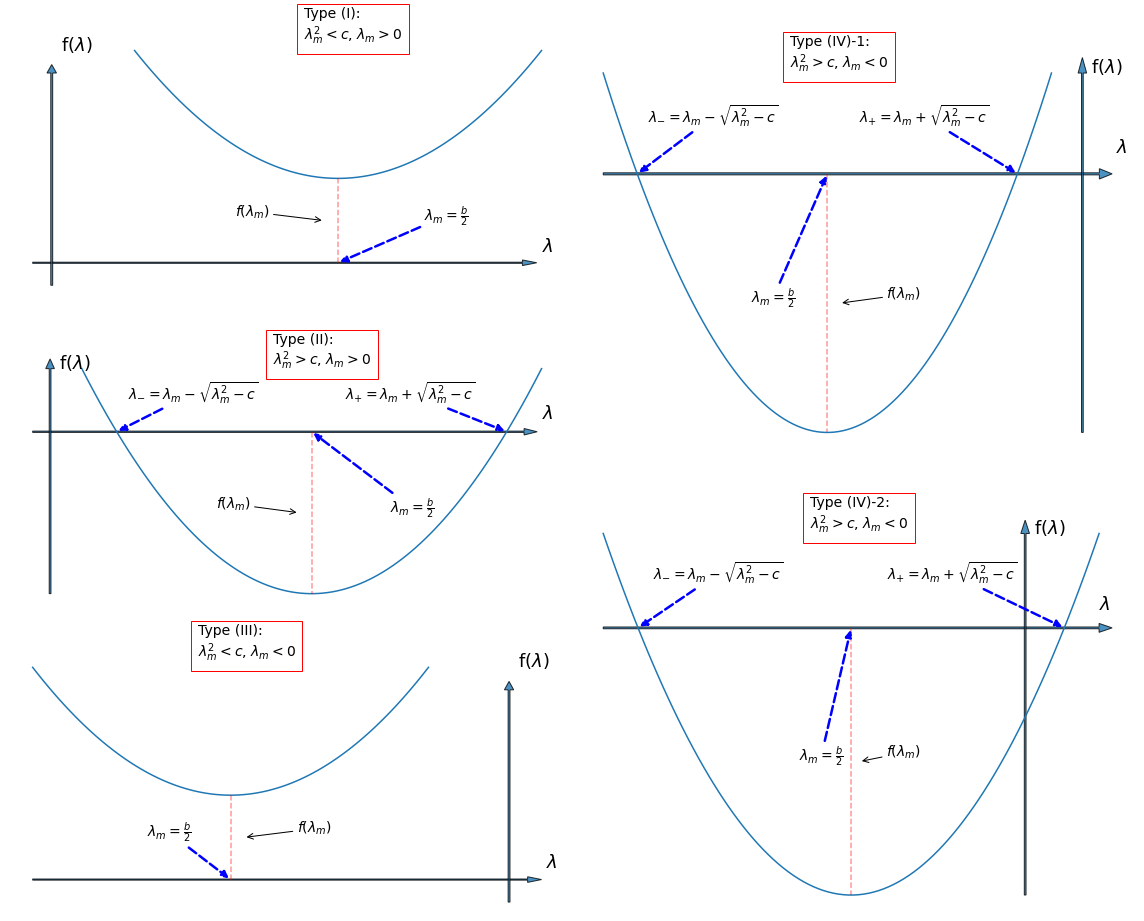

In [231]:
fig = plt.figure(figsize=(16,13))
gs = GridSpec(6, 2, figure=fig)

ax = fig.add_subplot(gs[0:2, 0])
plot_quadratic(3, 3, 
               ax,
               r"Type (I): " "\n" "$\lambda_m^2 < c$, $\lambda_m > 0$")
ax = fig.add_subplot(gs[2:4, 0])
plot_quadratic(3, 1, 
               ax,
               r"Type (II): " "\n" "$\lambda_m^2 > c$, $\lambda_m > 0$")

ax = fig.add_subplot(gs[4:6, 0])
plot_quadratic(-3, 3, 
               ax,
              r"Type (III): " "\n" "$\lambda_m^2 < c$, $\lambda_m < 0$")
ax = fig.add_subplot(gs[0:3, 1])
plot_quadratic(-3, 1, 
               ax,
              r"Type (IV)-1: " "\n" "$\lambda_m^2 > c$, $\lambda_m < 0$")

ax = fig.add_subplot(gs[3:6, 1])
plot_quadratic(-2, -.5, 
               ax,
              r"Type (IV)-2: " "\n" "$\lambda_m^2 > c$, $\lambda_m < 0$")
plt.tight_layout()
plt.show()

## Eigenvalues of a $2 \times 2$ matrix

In this section, we will find the eigenvalues of a $2 \times 2$ matrix. By using the properties of quadratic equations, we can specify the sign of the largest eigenvalue.

The eigenvalues of a matrix
<h3><center>$\boldsymbol{M}= \left[\begin{matrix}A & B\\C & D\end{matrix}\right]$,</center>(8)</h3>

are the solutions of the characteristic equation
<h4><center>$det(\boldsymbol{M} - \lambda \boldsymbol{I}) = \left|\begin{matrix}A-\lambda & B\\C & D-\lambda\end{matrix}\right| = \lambda^2 - (A+D)\lambda+ (AD- BC) = 0$.</center>(9)</h4> 

One can rewrite the last quadratic equation as
<h4><center>$\lambda^2 - tr(\boldsymbol{M}) \lambda+ det(\boldsymbol{M}) = 0$,</center>(10)</h4>

which is equavalent to equation (1) for
<h4><center>$b = tr(\boldsymbol{M}), \qquad c = det(\boldsymbol{M})$.</center>(11)</h4>

Here, the $\lambda_m$ finds as
<h4><center>$\lambda_m = \frac{tr(\boldsymbol{M})}{2}$,</center>(12)</h4>

and therefore by using equation (6), it is easy to find the eigenvalues as
<h3><center>$\lambda_{\pm} = \frac{tr(\boldsymbol{M})}{2} \pm \sqrt{\frac{tr(\boldsymbol{M})^2}{4} - det(\boldsymbol{M})}.$</center>(13)</h3>

__Note 1__: Recall that the sum of two complex conjugate numbers are twice the real part of each
<h4><center>$ c + \bar{c} = 2 Re(c)$.</center></h4>

At the same time, since the trace of a matrix is an invariant and is equal to the sum of it eigenvalues, for two complex conjugates eigenvalues, we have

<h4><center>$tr(\boldsymbol{J_0}) = \lambda + \bar{\lambda} = 2 Re(\lambda)$.</center></h4>

So, the sign of the real part of the complex conjugate eigenvalues is the same as the sign of the trace.

Finally, the sign of $\lambda_{+}$ will be determined as follows

1) __Type (I)__ : 

> $\lambda_m > 0$, $\lambda_m^2 < c$ is equivalent to $tr(\boldsymbol{M}) > 0$ and $tr(\boldsymbol{M})^2 < 4  det(\boldsymbol{M})$. Then, eigenvalues are a pair of complex conjugates. In addition, since the trace is positive, the real part of the eigenvalues is positive.

2) __Type (II)__  :

> Equivalently, $\lambda_m > 0$, $\lambda_m^2 > c$ is the same as writing $tr(\boldsymbol{M}) > 0$ and $tr(\boldsymbol{M})^2 > 4  det(\boldsymbol{M})$. So, the larger eigenvalue is always positive, $\lambda_{+} > 0$. 


3) __Type (III)__ : 

> $\lambda_m < 0$, $\lambda_m^2 < c$ is equivalent to $tr(\boldsymbol{M}) < 0$ and $tr(\boldsymbol{M})^2 < 4  det(\boldsymbol{M})$. Then, eigenvalues are a pair of complex conjugates. In addition, since the trace is negative, the real part of the eigenvalues is also negative.


4) __Type (IV)__  :

> $\lambda_m < 0$, $\lambda_m^2 > c$, or for $tr(\boldsymbol{M}) < 0$ and $tr(\boldsymbol{M})^2 > 4 det(\boldsymbol{M})$, depending on the sign of $det(\boldsymbol{M})$, the larger eigenvalues can be positive or negative:
>   - If $det(\boldsymbol{M}) > 0$, then $\lambda_{+} < 0$.
>   - Otherwise, $\lambda_{+} > 0$.

## Turing Stability: No diffusion

Let us start with a two-component reaction-diffusion model:
<h3><center>$\frac{\partial u}{\partial t} = D_u \nabla^2 u + f(u, v)$,</center></h3>

<h3><center>$\frac{\partial v}{\partial t} = D_v \nabla^2 v +  g(u, v)$,</center></h3>

where $u$ and $v$ are the concentration of two spices, $D_u$ and $D_v$ are the diffusion coefficients, and $f(u,v)$ and $g(u,v)$, or kinetic terms, are two given functions.

For a given set of parameters, to study the capability of a Turing system to produce steady-state patterns, first, we assume a non-diffusive model ($D_v = D_v = 0$). Then, one needs to find one or more stationary states that simultaneously are the solution of  $f(u, v)$ and $g(u, v)$, or equivalently
<h4><center>$f(u, v) = 0$,</center></h4>

<h4><center>$g(u, v) = 0$.</center></h4>

Denoting the solutions of the above system of equations by $u_0$ and $v_0$, next, one needs to linearise kinetic terms by writing the Jacobian of $f(u, v)$ and $g(u,v)$, evaluated at $u_0$ and $v_0$ as

<h3><center>$\boldsymbol{J_0} = \left. \left[\begin{matrix}\frac{\partial f}{\partial u} & \frac{\partial f}{\partial v}\\\frac{\partial g}{\partial u} & \frac{\partial g}{\partial v}\end{matrix}\right]\right|_{(u_0, v_0)} \equiv \left[\begin{matrix} f_u & f_v\\ g_u &  g_v\end{matrix}\right]$,</center>(14)</h3>

where we used the subscript (e.g. $f_u \equiv \left. \frac{\partial f}{\partial u}\right|_{(u_0, v_0)}$) to show the partial derivatives for less cluttered notation.

The stability of the non-diffusive solutions depends on the signs of the eigenvalues of $\boldsymbol{J_0}$ such that:

1) Negative eigenvalues are equivalent to a stable solution.

2) One or more positive eigenvalue makes the solution unstable.

Note that it is sufficient to check the sign of the largest eigenvalue to check the solutions' stability. At this moment, using what we have observed in previous sections, it is easy to find these conditions.

<h4><center>$tr(\boldsymbol{J_0}) = f_u + g_v$.</center></h4>

<h4><center>$det(\boldsymbol{J_0}) = f_u g_v - f_v g_u$.</center></h4>


<h4><center>$\lambda_{\pm} = \frac{f_u + g_v}{2} \pm \sqrt{\frac{(f_u + g_v)^2}{4} - (f_u g_v - f_v g_u)}.$</center></h4>



1) __Type (I)__ : 

> If $f_u + g_v > 0$ and $(f_u + g_v)^2 < 4 (f_u g_v - f_v g_u)$, then, eigenvalues are a pair of complex conjugates with positive real parts. Therefore, it is an unstable case (Hopf unstability).

2) __Type (II)__: 

> If $f_u + g_v > 0$ and $(f_u + g_v)^2 > 4 (f_u g_v - f_v g_u)$, the larger eigenvalue is always positive, $\lambda_{+} > 0$, and the solution is unstable. 


3) __Type (III)__ : 

> If $f_u + g_v < 0$ and $(f_u + g_v)^2 < 4 (f_u g_v - f_v g_u)$, then, eigenvalues are a pair of complex conjugates with negative real parts. Therefore, it is an stable case (Hopf stability).



4) __Type (IV)__: 

> If $f_u + g_v < 0$ and $(f_u + g_v)^2 > 4 (f_u g_v - f_v g_u)$, depending on the sign of $f_u g_v - f_v g_u$, the larger eigenvalues can be positive or negative:
>   1. If $f_u g_v - f_v g_u > 0$, then $\lambda_{+} < 0$ and the solution is stable.
>   2. Otherwise, $\lambda_{+} > 0$ and the solution is unstable.
   
Combining all the cases, we can reduce the stability condition as follows: 

- __Turing stability__ corresponds to Type IV-1
<h3><center>$f_u + g_v < 0$,</center></h3>
<h3><center>$(f_u - g_v)^2 + 4 f_v g_u >  0$.</center></h3>
<h3><center>$f_u g_v - f_v g_u > 0$.</center></h3>

- __Hopf stability__ corresponds to Type III
<h3><center>$f_u + g_v < 0$,</center></h3>
<h3><center>$(f_u - g_v)^2 + 4 f_v g_u <  0$.</center></h3>



## Stability analysis after introducing diffusion

For a given Fourier mode with wavenumber $k$, including the diffusion ($D_u, D_v \ne 0$) changes the Jacobian matrix as

<h3><center>$\boldsymbol{J} \equiv \boldsymbol{J_0} - k^2 \boldsymbol{D} = \left[\begin{matrix} f_u - k^2 D_u & f_v\\ g_u &  g_v - k^2 D_v \end{matrix}\right]$,</center>(15)</h3>

and consequently, trace and determinant of matrix $\boldsymbol{J}$ obtain
<h4><center>$tr(\boldsymbol{J}) = f_u + g_v - k^2 (D_u + D_v) = tr(\boldsymbol{J_0}) - k^2 (D_u + D_v)$,</center>(16)</h4>

<h4><center>$det(\boldsymbol{J}) = f_u g_v - f_v g_u - k^2 (D_v f_u + D_u g_v) + k^4 D_u D_v = det(\boldsymbol{J_0}) - k^2 (D_v f_u + D_u g_v) + k^4 D_u D_v$</center>(17)</h4>

Notice the effect of including the diffusion on the trace. Since both diffusion coefficients are positive, and therefore, $k^2 (D_u + D_v)$ is positive, including the diffusion subtracts a positive value from $tr(\boldsymbol{J_0})$. And for wavenumbe $k=0$, trace and determinant are equal to $\boldsymbol{J_0}$'s.

Recall that the novelty of the Turing idea is in the observation that diffusion changes stability to instability. Hence, the no-diffusive states must satisfy the stability conditions we found in the last section. What we are trying to do here is precisely similar to the previous section but for $\boldsymbol{J}$ instead of $\boldsymbol{J_0}$. Thus, the stability condition of $\boldsymbol{J}$ depends on its trace and determinant,  and therefore, one must find what conditions must be satisfied to consider $\boldsymbol{J}$ in the region of _Types I, II and IV-2_ parameters, provided that the $\boldsymbol{J_0}$ meets _Type III or IV-1_ conditions.


- __Turing stability to instability__ corresponds to Type IV-1 to IV-2. Or say, the trace of $\boldsymbol{J_0}$ must be negative, or
<h4><center>$tr(\boldsymbol{J_0})< 0$,</center>(18)</h4>
and also the second condition must be satisfied by the parameters
<h4><center>$tr(\boldsymbol{J_0})^2 > 4det(\boldsymbol{J_0})$,</center>(19)</h4>
so, the trace of $\boldsymbol{J}$, or  
<h4><center>$tr(\boldsymbol{J}) = tr(\boldsymbol{J_0}) - k^2 (D_u + D_v) < tr(\boldsymbol{J_0}) < 0$</center>(20)</h4>
is always negative for all $k > 0$. 
And when the trace of $\boldsymbol{J}$ is negative, the stability of diffusive system must be in one of Type III or IV, and between them type IV-2 is unstable. Combining these conditions implies that to have an unstable state including diffusion, it must satisfy
<h4><center>$\left\{\begin{matrix} tr(\boldsymbol{J}) < 0 \\ det(\boldsymbol{J}) < 0 \\ tr(\boldsymbol{J})^2 > 4 det(\boldsymbol{J})  \end{matrix}\right.$</center>(21)</h4>
We showed that condition one is always true. And if condition two is fulfiled by the system's parameters, the third condition will be automatically true (a squared number that is always positive is also greater than a negative value).
Using equation (17), the determinant in the second condition expands as
<h4><center>$ (f_u g_v - f_v g_u)- k^2 (D_v f_u + D_u g_v) + k^4 D_u D_v< 0$.</center>(22)</h4>
Let us rewrite it as quadratic equation for $Y = k^2 > 0$
<h4><center>$ Y^2 - \frac{D_v f_u + D_u g_v}{D_u D_v} Y +  \frac{f_u g_v - f_v g_u}{D_u D_v} < 0$.</center>(23)</h4>
This is exactly the same quadratic form that we introduced at the beginning for
<h4><center>$ b = \frac{D_v f_u + D_u g_v}{D_u D_v}, \qquad c = \frac{f_u g_v - f_v g_u}{D_u D_v}$.</center>(24)</h4>
So, looking at the five quadratic plots in figure 1 (remember to switch $\lambda$ by $Y$ to compare), Type II is the only case among five ones that have negative values ($f(Y) < 0$) for positive $Y$, which implies
<h4><center>$ Y_m = \frac{b}{2} = \frac{D_v f_u + D_u g_v}{2D_u D_v} > 0 \implies D_v f_u + D_u g_v > 0$,</center>(25)</h4>
and also
<h4><center>$ b^2 > 4c \implies (D_v f_u + D_u g_v)^2 > 4D_u D_v (f_u g_v - f_v g_u) $.</center>(26)</h4>

__Note 1__: Equation (25) specifies the position of the most instable wavenumber (the peak of the $f(Y)$ function). This is technically the wavenumber that a bifurcation start, and denoting it by $k_c$ we have
<h4><center>$ k_c = \sqrt{\frac{D_v f_u + D_u g_v}{2D_u D_v}}$.</center>(27)</h4>

- __Hopf stability to instability__ corresponds to Type III to I. Initially, the trace of $\boldsymbol{J_0}$ must be negative (stability in Type III), or
<h4><center>$tr(\boldsymbol{J_0})< 0$,</center>(28)</h4>
and also 
<h4><center>$tr(\boldsymbol{J_0})^2 < 4det(\boldsymbol{J_0})$.</center>(29)</h4>

However, after introducing diffusion, to be in Type I region of parameters, the trace of matrix $\boldsymbol{J}$ must be positive
<h4><center>$tr(\boldsymbol{J}) > 0$,</center>(30)</h4>
which is impossibe, since
<h4><center>$tr(\boldsymbol{J}) =  tr(\boldsymbol{J_0}) - k^2 (D_u + D_v) < tr(\boldsymbol{J_0}) < 0$.</center>(31)</h4>

Therefore, the Hopf stability to instability is __impossible__.

- __Hopf stability to Turing instability__ corresponds to Type III to II or IV-2. Without diffusion and for Type III, the trace of $\boldsymbol{J_0}$ must be positive (stability in Type III),
<h4><center>$tr(\boldsymbol{J_0})< 0$,</center>(32)</h4>
and also 
<h4><center>$tr(\boldsymbol{J_0})^2 < 4det(\boldsymbol{J_0})$.</center>(33)</h4>
Adding diffusion, we can use the same argument from the "Hope stability to instability" part to show that Type II is impossible ($tr(\boldsymbol{J})$ is negative which must be positive for Type II).

The case of Type IV-2 is exactly the same as "Turing stability to instability" such that it requires
<h4><center>$\left\{\begin{matrix} tr(\boldsymbol{J}) < 0 \\ det(\boldsymbol{J}) < 0 \\ tr(\boldsymbol{J})^2 > 4 det(\boldsymbol{J})  \end{matrix}\right.$</center>(34)</h4>
such that the first condition is already fulfilled and the second condition satisfies the third. It imples
<h4><center>$ D_v f_u + D_u g_v > 0$,</center>(35)</h4>
and
<h4><center>$(D_v f_u + D_u g_v)^2 > 4D_u D_v (f_u g_v - f_v g_u) $,</center>(36)</h4>
and the onset of bifurcation starts at wavenumber
<h4><center>$ k_c = \sqrt{\frac{D_v f_u + D_u g_v}{2D_u D_v}}$.</center>(37)</h4>


## Conclusion

Here, we list all the conditions that linear stability imposes on the bound of the parameters to get Turing stability:

- __Turing stability to instability__
> <h4><center>$f_u + g_v < 0$,</center></h4>
> <h4><center>$(f_u - g_v)^2 + 4 f_v g_u >  0$,</center></h4>
> <h4><center>$f_u g_v - f_v g_u > 0$,</center></h4>
> <h4><center>$ D_v f_u + D_u g_v > 0$,</center></h4>
><h4><center>$(D_v f_u + D_u g_v)^2 > 4D_u D_v (f_u g_v - f_v g_u)$,</center></h4>
>with 
><h4><center>$ k_c = \sqrt{\frac{D_v f_u + D_u g_v}{2D_u D_v}}$.</center></h4>

- __Hopf stability to Turing instability__
> <h4><center>$f_u + g_v < 0$,</center></h4>
> <h4><center>$(f_u - g_v)^2 + 4 f_v g_u <  0$,</center></h4>
> <h4><center>$f_u g_v - f_v g_u > 0$,</center></h4>
> <h4><center>$ D_v f_u + D_u g_v > 0$,</center></h4>
><h4><center>$(D_v f_u + D_u g_v)^2 > 4D_u D_v (f_u g_v - f_v g_u)$,</center></h4>
>with 
><h4><center>$ k_c = \sqrt{\frac{D_v f_u + D_u g_v}{2D_u D_v}}$.</center></h4>

We can see the second condition in both lists above covers all possibility. So, to study Turing instability from stability, independent of the type of stability, one can write four inequalities 

 <h4><center>$f_u + g_v < 0$,</center></h4>
 <h4><center>$f_u g_v - f_v g_u > 0$,</center></h4>
 <h4><center>$ D_v f_u + D_u g_v > 0$,</center></h4>
 <h4><center>$(D_v f_u + D_u g_v)^2 > 4D_u D_v (f_u g_v - f_v g_u)$,</center></h4>

<h1><center>Section 2: Brusselator model</center> </h1>

## Introduction

In this section, we will apply the result of the previous section on the Brusselator model. To speed up the calculation, we will use the _sympy_ library that provides the symbolic computation for Python. This way, we can derive the result quickly and fast.
In each cell, we might use some commands from _sympy_ (explained by a comment) or any of the following commands:

__lprint__: Print a string into the ouput that has one or placeholders for latex scripts.

__hprint__: Print a sympy object into the ouput that is starts with the provded header as latex script.

Below are some examples

In [241]:
lprint(lprint("The fraction is {0}={1}:", r"\lambda^*", r"\frac{B-1-A^2}{2}"))
hprint("This \, is \, \pi \, in \, sympy: ", pi)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Brusselator PDEs

> The Brusselator PDEs for two species are
<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

for diffusion constants $D_u$, $D_v$, and model parameters $A, B > 0$.
Therefore, the kinetic terms are

<h3><center>$f(u,v) = A - (B+1)u + u^2v$</center></h3>
<h3><center>$g(u,v) = Bu - u^2 v$</center></h3>

To start with __sympy__, we must define the list of parameters that will be used as symbol.

In [499]:
A, B, D_u, D_v, u, v, k = symbols('A, B, D_u, D_v, u, v, k', real=True)
#k = symbols('k', integer=True)

Next, we can define the kinetic terms, $f(u, v)$ and $g(u, v)$ for parameters $(D_u, D_v, A, B)$

In [500]:
# define kinteic terms symbolically in sympy
f = A - (B + 1) * u + u**2 * v
g = B * u - u**2 * v
# print their form
hprint("f(u,v) = ", f)
hprint("g(u,v) = ",g)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

and mixing them as a vector is using _Matrix_ method like

In [501]:
Kinetic = Matrix(
    [[f], 
     [g]])
hprint(r"\boldsymbol{f}(u, v) = ", Kinetic)

<IPython.core.display.Latex object>

After that, we need to find the steady state solutions of the system without diffusion by solving the following nonlinear equations

<center>$f(u,v) = A - (B+1)u + u^2v = 0$</center>
<center>$g(u,v) = Bu - u^2 v = 0$</center>

The solution of the above equations, dented by $u^*$ and $v^*$, is such that
<center>$f(u^*, v^*) = 0$</center>
<center>$g(u^*, v^*) = 0$</center>

In _sympy_ it we can solve the system symbolicly by using the _solve_ function

In [502]:
# finding the steady state of the system, which
# is the solution of the system with respect to u and v
u_star, v_star = solve(Kinetic, (u, v))[0]
hprint("u^* = ", u_star)
hprint("v^* = ", v_star)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Next, to linearise the PDE system, we must derive the Jacobian of $(f, g)$ that is evaluated at $(u^*, v^*)$ 

In [503]:
# Find the jacobian of the vectorised kinetic terms w.r.t. u and v
J_0 = Kinetic.jacobian([u, v])
# Print the jacobian
hprint(r"J_0= \frac{\partial \boldsymbol{f}_i}{\partial u_j} = ", J_0)
# Evaluate the jacobian at the stationary solution
J_0 = J_0.subs([(u, u_star), (v, v_star)])
# print the jacobian at the stationary solution
hprint("J_0|_{(u^*, v^*)} =", J_0)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eigenvalues of the resulting matrix in terms of parameters $A$ and $B$ derives by calling _eigenvals_ function

In [504]:
# Deriving eigenvalues of the jacobian in terms of parameter A and B
λ_0_1, λ_0_2 =  list(J_0.eigenvals().keys())
hprint("\lambda^{(0)}_1 = ", λ_0_1)
hprint("\lambda^{(0)}_2 = ", λ_0_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can find the region of the $(A, B)$ plan where both $\lambda_1$ and $\lambda_2$ are negative (Turing stability) or directly use the inequalities we saw in the previous section.
Here, we try both of them and get exactly the same result.

In [505]:
# Find the trace and determinant of J_0 symbolically
cond_1 = J_0.trace()
cond_2 = J_0.det()
lprint(r"Condition 1: {0} $< 0$", latex(cond_1))
lprint(r"Condition 2: {0} $> 0$", latex(cond_2))
# convert the symbolic trace and determinants to numpy functions
cond_1_f = lambdify([A, B], cond_1, modules='numpy')
cond_2_f = lambdify([A, B], cond_2, modules='numpy')
# convert the symbolic lambda_2 to a numpy function
λ_0_2_f = lambdify([A, B], λ_0_2, modules='numpy')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

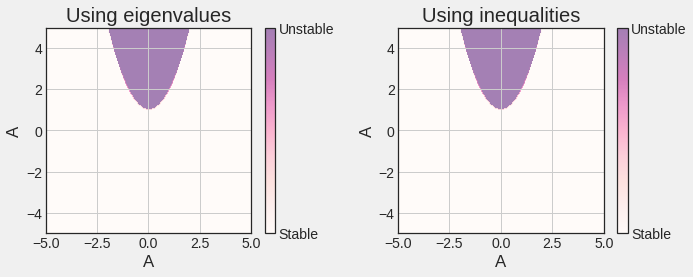

In [506]:
# Create a meshgrid [-5, 5]x[-5, 5] for (A, B) domain
L = 5
A_size = 200
B_size = 200
A_axis = L * np.linspace(-1, 1, A_size)
B_axis = L * np.linspace(-1, 1, B_size)
A_grid, B_grid = np.meshgrid(A_axis, B_axis, sparse=False)
# Plotting
fig = plt.figure(figsize=(10,4))
plt.style.use('seaborn-white')
ax = fig.add_subplot(121)
ax.set_title("Using eigenvalues")

# Numerically calculate the largest eigenvalues
domain = λ_0_2_f( np.complex64(A_grid) , np.complex64(B_grid))
# plot the domain by using zero as the levelset
plot_two_levels(ax, np.real(domain), L, "A", "B", 0, ['Stable', 'Unstable'])

ax = fig.add_subplot(122)
ax.set_title("Using inequalities")

# Numerically calculate the values of the condition one
domain = cond_1_f(A_grid , B_grid)
# plot the domain by using zero as the levelset
plot_two_levels(ax, domain,L, "A", "B", 0, ['Stable', 'Unstable'])
plt.tight_layout()
plt.show()

Including the diffusion, the matrix $\boldsymbol{J}$ defines as
<center>$\boldsymbol{J} = \boldsymbol{J_0} - k^2 \boldsymbol{D}$</center>
and we can use _sympy_ to find its egenvalues symbolically as follows:

In [507]:
# Define J 
J = J_0 - Matrix([[D_u*k**2, 0       ], 
                  [0,        D_v*k**2]])
# print its form
lprint(r"$\boldsymbol{J}$ = {0}", latex(J))
# Find its eigenvalues
λ_1, λ_2 =  list(J.eigenvals().keys())
hprint("\lambda_1 = ", λ_1)
hprint("\lambda_2 = ", λ_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Find the critical wavenumber which is defined as
<center>$k_c =\sqrt{\frac{f_u }{2 D_u} + \frac{g_v}{2 D_v}}$</center>

In [508]:
f_u = J_0[0, 0]
f_v = J_0[0, 1]
g_u = J_0[1, 0]
g_v = J_0[1, 1]

lprint(r"$f_u$={0}", latex(f_u))
lprint(r"$f_v$={0}", latex(f_v))
lprint(r"$g_u$={0}", latex(g_u))
lprint(r"$g_v$={0}", latex(g_v))

k_c = sqrt(f_u/(2 * D_u) + g_v/(2 * D_v))

lprint(r"$k_c$={0}", latex(k_c))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Before checking the validity of the critical wavenumber, let us find the bifurcation point for given values of $D_u = 1$, $D_v = 10$ and $B = 2$.

The onset of bifurcation finds by equation (36) and when it is an equality
<center>$(D_v f_u + D_u g_v)^2 \le 4D_u D_v (f_u g_v - f_v g_u)$<center>
 So, when we write this inequality for the Brusselator model, we have

In [534]:
bifurcation_con = simplify((D_v * f_u + D_u * g_v)**2 
                           - 4 * D_u *D_v * (f_u * g_v - f_v * g_u))
lprint("The onset of bifurcation condition: {0} = 0", latex(bifurcation_con))

<IPython.core.display.Latex object>

And substituting $D_u = 1$, $D_v = 10$ and $B = 2$ leaves an equation for $A$ which we can solve

In [535]:
bifurcation_con = bifurcation_con.subs([(D_u, 1), (D_v, 10), (B, 2)])
lprint("The onset of bifurcation condition: {0} = 0", latex(bifurcation_con))

<IPython.core.display.Latex object>

In [550]:
solutions = solve(bifurcation_con)
lprint("Solutions: {0}", latex(solutions))
A_val = np.float64(solutions[0].evalf())
lprint("A={0}" f"={A_val:.4f}", latex(solutions[0]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

So, $(D_u=1, D_v=10, A=-\sqrt{30 - 20 \sqrt{2}}, B=2)$ is the onset of bifurcation.
We plot $\lambda_2(k)$ against $k$ and $k_c$ as a vertical line

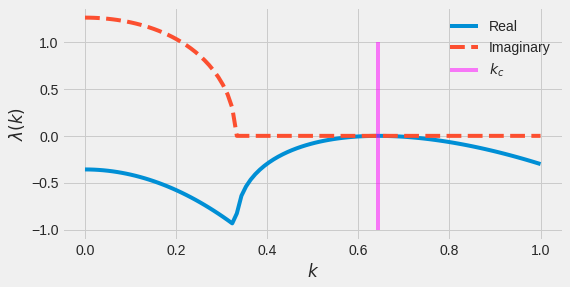

In [573]:
ks = np.complex64(np.linspace(0, 1, num=100))

λ_2_f = lambdify([k, A, B, D_u, D_v], λ_2, modules='numpy')
λ_2_graph = λ_2_f(ks, A =A_val, B = 2, D_u = 1, D_v = 10)


fig = plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(ks,np.real(λ_2_graph), label='Real')
plt.plot(ks,np.imag( λ_2_graph),  '--', label='Imaginary')

k_c_f = lambdify([A, B, D_u, D_v], k_c, modules='numpy')
k_critical = k_c_f(A = A_val, B = 2, D_u = 1, D_v = 10)
plt.vlines(k_critical, -1 , 1, color='magenta', linestyle='-', alpha=.5,
           label=r"$k_c$")
plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda(k)$")
plt.legend()
plt.show()

is is important to note that the $k_c$ relation becomes invalid when we move the parameters from the onset of bifurcation. e.g. we add 0.2 to the calculated $A$ and see the $k_c$ is not accurate anymore

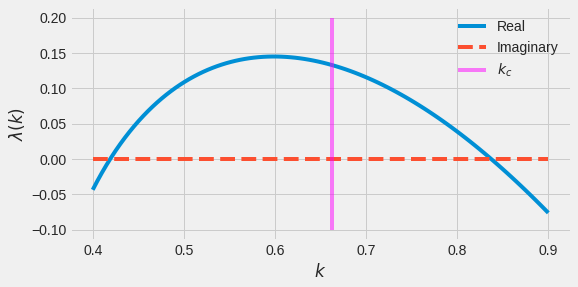

In [581]:
ks = np.complex64(np.linspace(0.4, .9, num=100))

λ_2_f = lambdify([k, A, B, D_u, D_v], λ_2, modules='numpy')
λ_2_graph = λ_2_f(ks, A =A_val+0.2, B = 2, D_u = 1, D_v = 10)


fig = plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(ks,np.real(λ_2_graph), label='Real')
plt.plot(ks,np.imag( λ_2_graph),  '--', label='Imaginary')

k_c_f = lambdify([A, B, D_u, D_v], k_c, modules='numpy')
k_critical = k_c_f(A = A_val+0.2, B = 2, D_u = 1, D_v = 10)
plt.vlines(k_critical, -.1 , .2, color='magenta', linestyle='-', alpha=.5,
           label=r"$k_c$")
plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda(k)$")
plt.legend()
plt.show()

In [15]:
lambda_k_1, lambda_k_2 =  list(J_2.eigenvals().keys())
hprint("\lambda_1(k) = ", lambda_k_1)
hprint("\lambda_2(k) = ", lambda_k_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [59]:
lambda_k_2.as_ordered_terms()

⎡                              ______________________________________________________________________________________
⎢  2           2        2     ╱  4      2        2     2      2     2      2    2           2           2           2
⎢-A    B  -Dᵤ⋅k    -Dᵥ⋅k    ╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k  + 2⋅A ⋅Dᵥ⋅k  - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k  + 2⋅B⋅Dᵥ⋅k  - 2⋅B + Dᵤ 
⎢────, ─, ───────, ───────, ─────────────────────────────────────────────────────────────────────────────────────────
⎣ 2    2     2        2                                                                          2                   

__________________________________________________      ⎤
  4            4         2     2  4         2           ⎥
⋅k  - 2⋅Dᵤ⋅Dᵥ⋅k  + 2⋅Dᵤ⋅k  + Dᵥ ⋅k  - 2⋅Dᵥ⋅k  + 1       ⎥
──────────────────────────────────────────────────, -1/2⎥
                                                        ⎦

In [63]:
t1, t2, t3, t4, t5, t6 = lambda_k_2.as_ordered_terms()
lambda_star = t1+t2+t6
display(lambda_star)
lambda_k_22 = lambda_star + t3 + t4 + t5
lambda_k_22

   2        
  A    B   1
- ── + ─ - ─
  2    2   2

                              _______________________________________________________________________________________
   2           2       2     ╱  4      2        2     2      2     2      2    2           2           2           2 
  A    B   Dᵤ⋅k    Dᵥ⋅k    ╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k  + 2⋅A ⋅Dᵥ⋅k  - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k  + 2⋅B⋅Dᵥ⋅k  - 2⋅B + Dᵤ ⋅
- ── + ─ - ───── - ───── + ──────────────────────────────────────────────────────────────────────────────────────────
  2    2     2       2                                                                          2                    

_________________________________________________    
 4            4         2     2  4         2         
k  - 2⋅Dᵤ⋅Dᵥ⋅k  + 2⋅Dᵤ⋅k  + Dᵥ ⋅k  - 2⋅Dᵥ⋅k  + 1    1
───────────────────────────────────────────────── - ─
                                                    2

#### Plot the wave-numbers envelope

/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


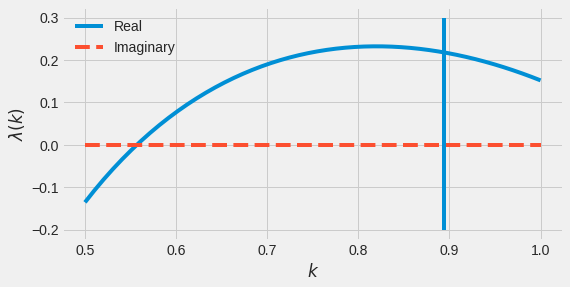

In [70]:
lambda_k_2_f = lambdify([k, A, B, D_u, D_v],lambda_k_2, modules='numpy')

ks = np.complex64(np.linspace(0.5, 1, num=50))

k_c_2 = ((B - 1) * D_v - A**2 * D_u)/(2 * D_u * D_v)
k_c_2_f = lambdify([A, B, D_u, D_v], k_c_2, modules='numpy')

fig = plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(ks, np.real(lambda_k_2_f(ks, A = 2, B = 3, D_u = 1, D_v = 10)), label='Real')
plt.plot(ks, np.imag(lambda_k_2_f(ks, A = 2, B = 3, D_u = 1, D_v = 10)), '--', label='Imaginary')

plt.vlines(np.sqrt(k_c_2_f(A = 2, B = 3, D_u = 1, D_v = 10)), -.2 , .3)
plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda(k)$")
plt.legend()
#plt.grid()
plt.show()

#### Finding the maximum of $\lambda_2(k)$, namely $k_c$ as the dominant wave-number

In [45]:
solveset(lambda_k_2.diff(k), k)

⎧          ___________________________________________________________________________________________        _______
⎪         ╱      2                   _________          _________                                            ╱      2
⎪        ╱      A ⋅Dᵤ⋅Dᵥ      A⋅Dᵤ⋅╲╱ B⋅Dᵤ⋅Dᵥ    A⋅Dᵥ⋅╲╱ B⋅Dᵤ⋅Dᵥ        B⋅Dᵤ⋅Dᵥ            Dᵤ⋅Dᵥ            ╱      A 
⎨0, -   ╱   ─────────────── - ──────────────── - ──────────────── + ─────────────── - ─────────────── ,    ╱   ──────
⎪      ╱      2           2     2           2      2           2      2           2     2           2     ╱      2   
⎪    ╲╱     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    ╲╱     Dᵤ ⋅Dᵥ
⎩                                                                                                                    

____________________________________________________________________________________         ________________________
                   _________          _________        

In [52]:
lambda_k_2.diff(k)#.subs(k, sqrt( ((B-1)*D_v - A**2 * D_u)/(2*D_u*D_v) ))

                                          2           2                                  2  3            3           
                                     - 2⋅A ⋅Dᵤ⋅k + 2⋅A ⋅Dᵥ⋅k - 2⋅B⋅Dᵤ⋅k + 2⋅B⋅Dᵥ⋅k + 2⋅Dᵤ ⋅k  - 4⋅Dᵤ⋅Dᵥ⋅k  + 2⋅Dᵤ⋅k +
-Dᵤ⋅k - Dᵥ⋅k + ──────────────────────────────────────────────────────────────────────────────────────────────────────
                    _________________________________________________________________________________________________
                   ╱  4      2        2     2      2     2      2    2           2           2           2  4        
               2⋅╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k  + 2⋅A ⋅Dᵥ⋅k  - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k  + 2⋅B⋅Dᵥ⋅k  - 2⋅B + Dᵤ ⋅k  - 2⋅Dᵤ⋅

     2  3                              
 2⋅Dᵥ ⋅k  - 2⋅Dᵥ⋅k                     
───────────────────────────────────────
_______________________________________
    4         2     2  4         2     
Dᵥ⋅k  + 2⋅Dᵤ⋅k  + Dᵥ ⋅k  - 2⋅Dᵥ⋅k  + 1 

# Appendix A.

<h4><center>$\left\{\begin{matrix} det(\boldsymbol{J}) < 0 \\ tr(\boldsymbol{J})^2 < 4 det(\boldsymbol{J})  \end{matrix}\right. \implies$</center></h4>

<h4><center>$\left\{\begin{matrix}  det(\boldsymbol{J_0}) - k^2 (D_v f_u + D_u g_v) < 0 \\ \left[ tr(\boldsymbol{J_0}) - k^2 (D_u + D_v)\right]^2 < 4 det(\boldsymbol{J_0}) - 4k^2 (D_u g_v + D_v f_u) + 4k^4 D_u D_v \end{matrix}\right. \implies$</center></h4>

<h4><center>$\left\{\begin{matrix}  det(\boldsymbol{J_0}) - k^2 (D_v f_u + D_u g_v) < 0 \\  tr(\boldsymbol{J_0})^2 + k^4 (D_u + D_v)^2 -2k^2 (D_u + D_v)tr(\boldsymbol{J_0}) < 4 det(\boldsymbol{J_0}) - 4k^2 (D_u g_v + D_v f_u) + 4k^4 D_u D_v\end{matrix}\right. \implies$</center></h4>

<h4><center>$\left\{\begin{matrix} det(\boldsymbol{J_0}) - k^2 (D_v f_u + D_u g_v) < 0 \\ tr(\boldsymbol{J_0})^2 < 4 det(\boldsymbol{J_0}) - k^4 (D_u - D_v)^2 + 2k^2 ((D_u + D_v)(f_u + g_v)-2D_u g_v - 2D_v f_u) \end{matrix}\right. \implies$</center></h4>

<h4><center>$\left\{\begin{matrix} det(\boldsymbol{J_0}) - k^2 (D_v f_u + D_u g_v) < 0 \\ tr(\boldsymbol{J_0})^2 < 4 det(\boldsymbol{J_0}) - k^4 (D_u - D_v)^2 + 2k^2 (D_u - D_v)(f_u - g_v)  \end{matrix}\right.$.</center></h4>